In [3]:
import numpy as np
import cmath
from sympy import*
import matplotlib
import matplotlib.pyplot as plt

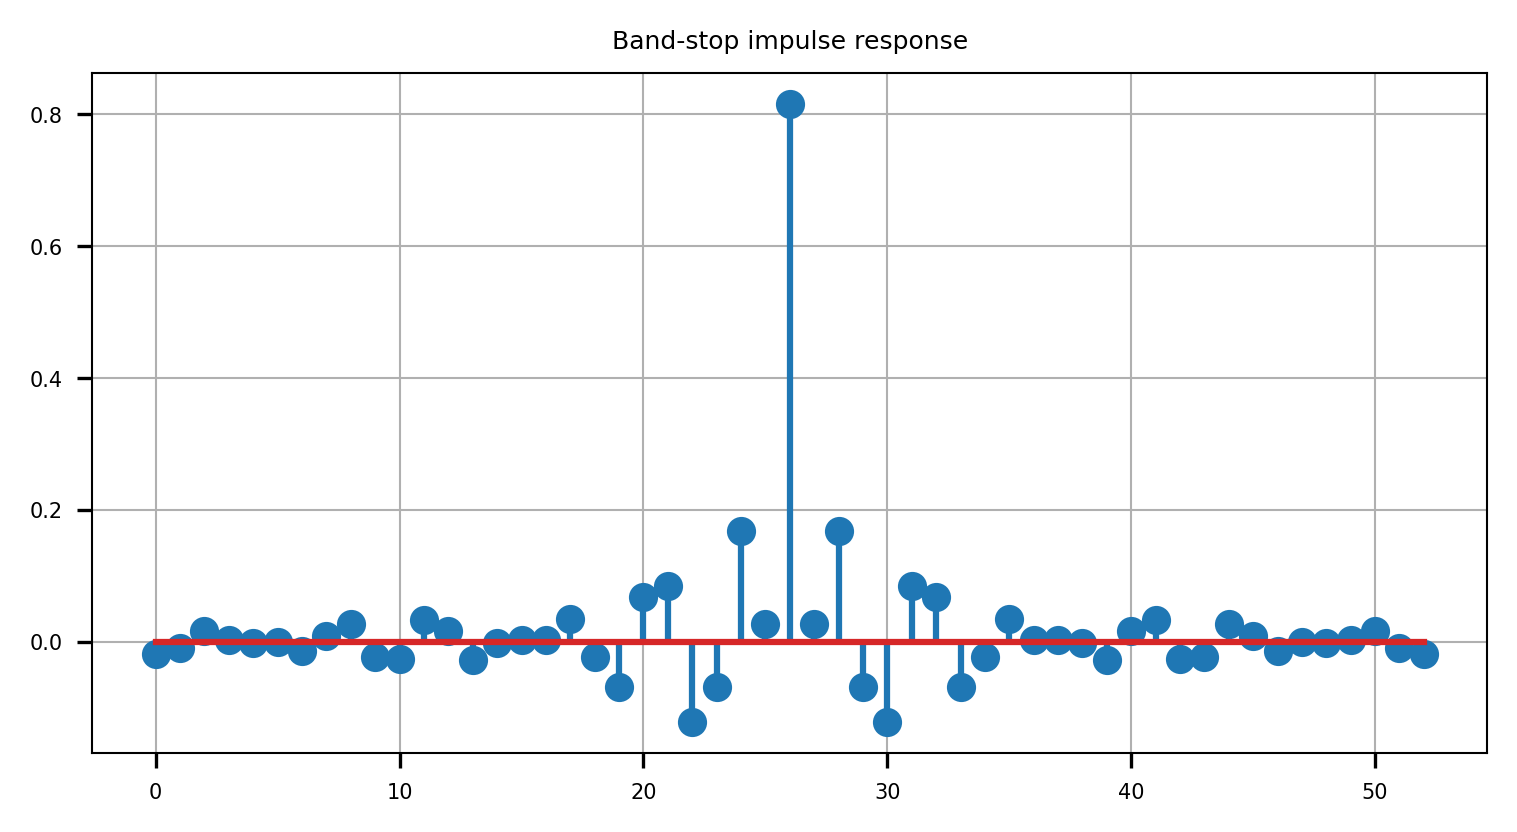

In [9]:
tolerance=0.15
A=-20*np.log10(tolerance)
wp1=np.pi*0.4385
ws1=np.pi*0.4692
ws2=np.pi*0.6231
wp2=np.pi*0.6538

z=symbols('z')
M=52
w1=(wp1+ws1)*0.5   #Lower cutoff of the ideal band-stop filter
w2=(wp2+ws2)*0.5   #Upper cutoff of the ideal band-stop filter
count=0
Hz=Function('Hz')(z)
Hz=0
li=[]
for i in range(M+1):
    if i!=np.round(M/2):
        li.append(-1/np.pi/(i-M/2)*(np.sin(w2*(i-M/2))-np.sin(w1*(i-M/2))))
        count=count+1
        Hz=Hz+li[i]*z**(-i)
    else:
        li.append(1-(w2-w1)/np.pi)
        Hz=Hz+li[i]*z**(-i)

x=np.linspace(0,M,M+1)
plt.figure(figsize=(6,3),dpi=300)
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
plt.axes().grid(linewidth=0.5)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.stem(x,li)
plt.title('Band-stop impulse response')
plt.savefig('BSI.png',bbox_inches='tight')


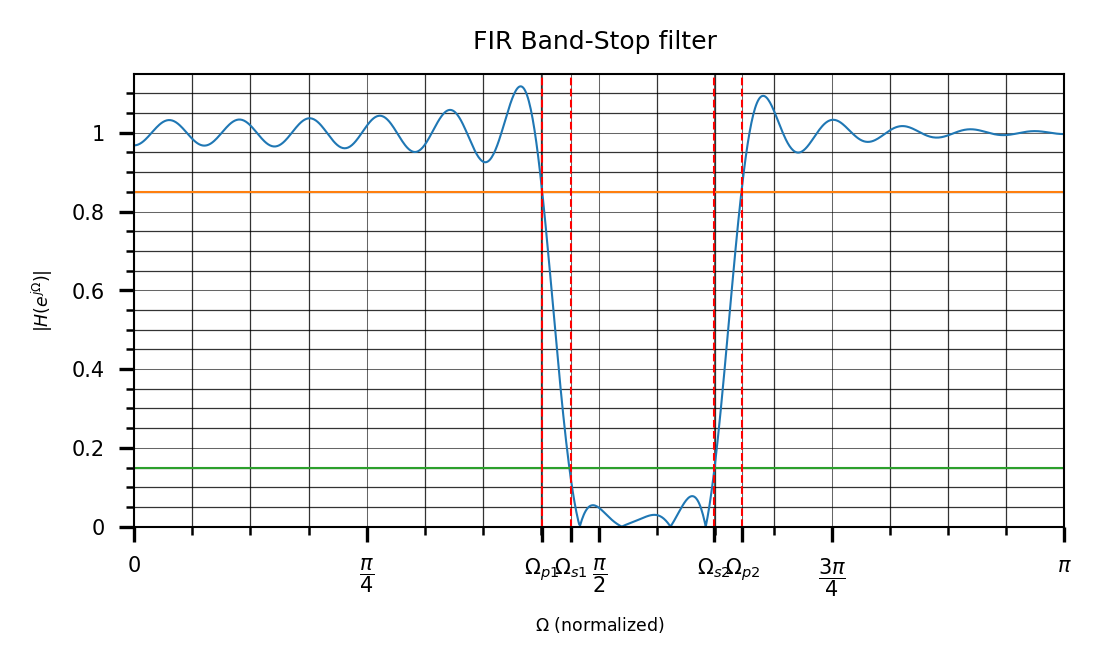

In [16]:
Hz_discrete=Hz.subs(z,exp(I*z))
absz=abs(Hz_discrete)
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
modH_lambdified=lambdify(z,absz)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,modH_lambdified(freq_axis),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$|H(e^{j\Omega})|$',fontsize='small')
plt.xticks([0, np.pi/4,0.4385*np.pi,0.4692*np.pi,np.pi/2,0.6231*np.pi,0.6538*np.pi,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\Omega_{p1}$',r'$\Omega_{s1}$',r'$\dfrac{\pi}{2}$',r'$\Omega_{s2}$',r'$\Omega_{p2}$',r'$\dfrac{3\pi}{4}$',r'$\pi$'])
plt.ylim(0,1.15)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.plot(freq_axis,np.linspace(0.85,0.85,1000),linewidth=0.5)
plt.plot(freq_axis,np.linspace(0.15,0.15,1000),linewidth=0.5)
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('FIR Band-Stop filter ')
plt.axvline(x=0.4385*np.pi,color='r',ls='--', lw=0.5)
plt.axvline(x=0.4692*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6231*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6538*np.pi,color='r',ls='--', lw=0.5)
plt.savefig('BSFIRM.png',bbox_inches='tight')
plt.show()

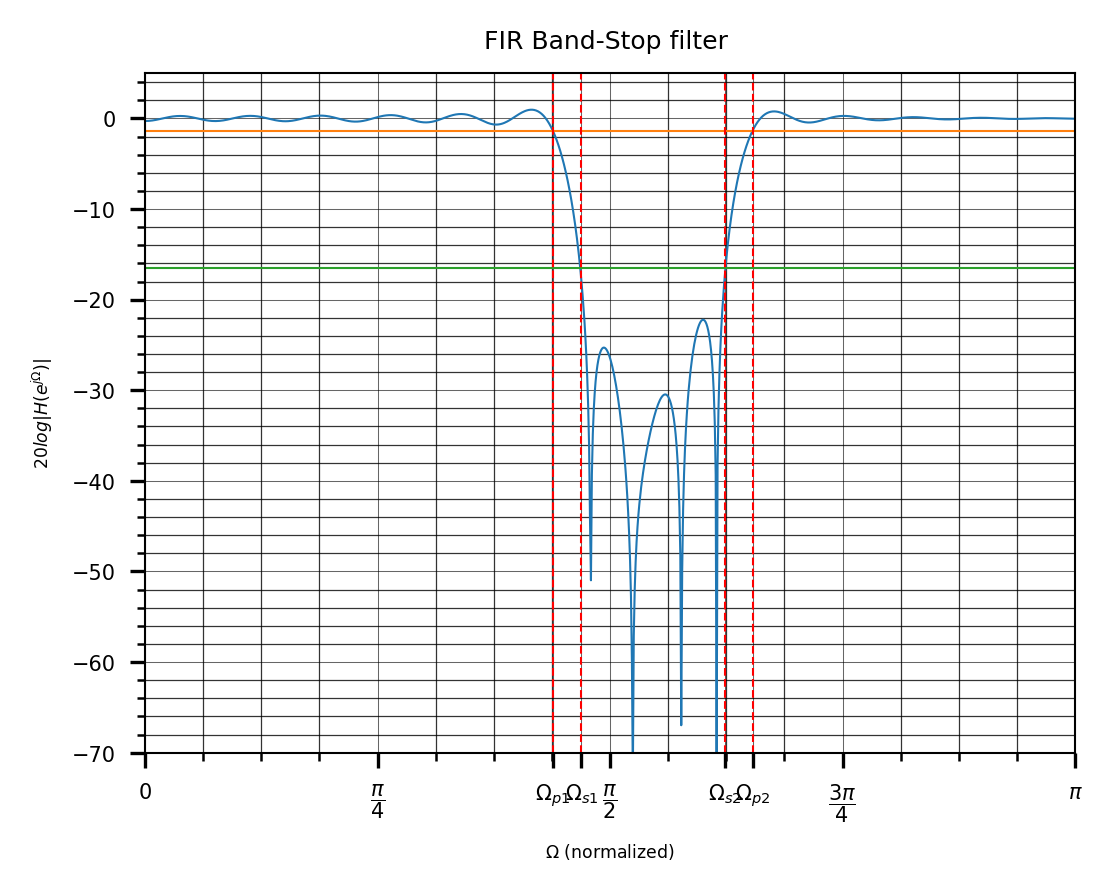

In [18]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
modH_lambdified=lambdify(z,absz)
plt.figure(figsize=(4,3),dpi=300)
plt.plot(freq_axis,20*np.log10(modH_lambdified(freq_axis)),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$20log|H(e^{j\Omega})|$',fontsize='small')
plt.xticks([0, np.pi/4,0.4385*np.pi,0.4692*np.pi,np.pi/2,0.6231*np.pi,0.6538*np.pi,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\Omega_{p1}$',r'$\Omega_{s1}$',r'$\dfrac{\pi}{2}$',r'$\Omega_{s2}$',r'$\Omega_{p2}$',r'$\dfrac{3\pi}{4}$',r'$\pi$'])
plt.ylim(-70,5)
plt.plot(freq_axis,20*np.log10(np.linspace(0.85,0.85,1000)),linewidth=0.5)
plt.plot(freq_axis,20*np.log10(np.linspace(0.15,0.15,1000)),linewidth=0.5)
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('FIR Band-Stop filter ')
plt.axvline(x=0.4385*np.pi,color='r',ls='--', lw=0.5)
plt.axvline(x=0.4692*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6231*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6538*np.pi,color='r',ls='--', lw=0.5)
plt.savefig('Band-Stop DB.png',bbox_inches='tight')
plt.show()

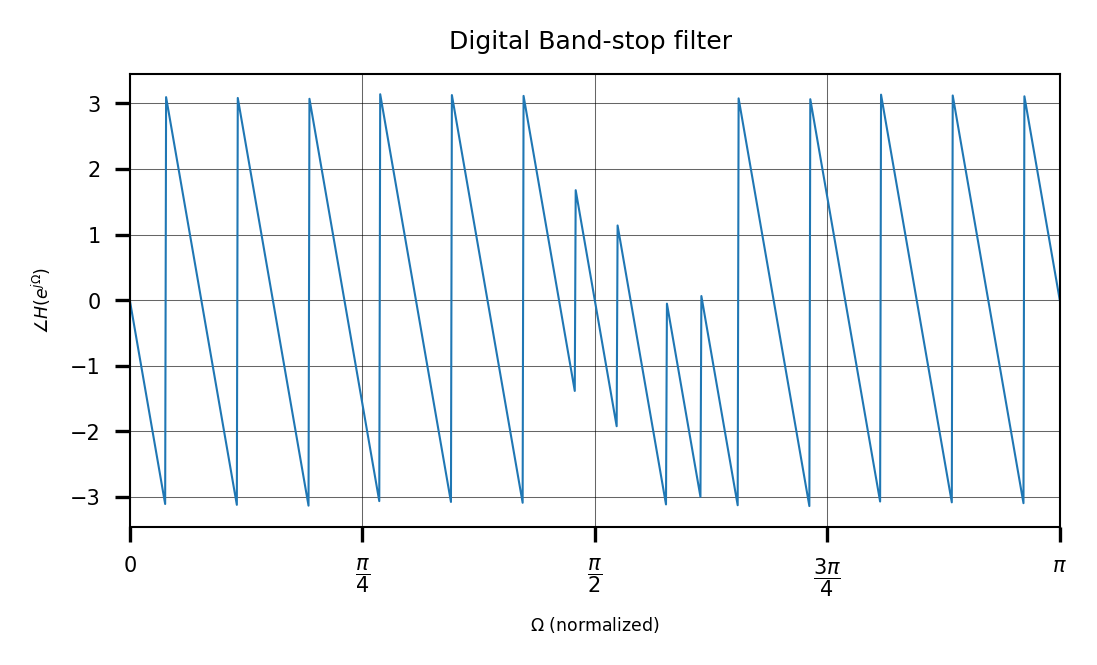

In [19]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
H_lambdified=lambdify(z,Hz_discrete)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,np.angle(H_lambdified(freq_axis)),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$\angle H(e^{j\Omega})$',fontsize='small')
plt.xticks([0, np.pi/4,np.pi/2,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\dfrac{\pi}{2}$',r'$\dfrac{3\pi}{4}$',r'$\pi$'])
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Digital Band-stop filter ')
plt.savefig('Band-stop angle.png',bbox_inches='tight')
plt.show()

In [28]:
for i in range(M+1):
    if(li[i]>0):
        print(i,': ',round(li[i],5))
    else:
        print(i,':',round(li[i],5))

0 : -0.01884
1 : -0.00973
2 :  0.01566
3 :  0.002
4 : -0.00277
5 : -0.00057
6 : -0.01438
7 :  0.00883
8 :  0.02665
9 : -0.02291
10 : -0.02702
11 :  0.03266
12 :  0.016
13 : -0.02737
14 : -0.00296
15 :  0.00278
16 :  0.00184
17 :  0.03461
18 : -0.02328
19 : -0.06926
20 :  0.06745
21 :  0.08381
22 : -0.12205
23 : -0.06834
24 :  0.16714
25 :  0.0263
26 :  0.8154
27 :  0.0263
28 :  0.16714
29 : -0.06834
30 : -0.12205
31 :  0.08381
32 :  0.06745
33 : -0.06926
34 : -0.02328
35 :  0.03461
36 :  0.00184
37 :  0.00278
38 : -0.00296
39 : -0.02737
40 :  0.016
41 :  0.03266
42 : -0.02702
43 : -0.02291
44 :  0.02665
45 :  0.00883
46 : -0.01438
47 : -0.00057
48 : -0.00277
49 :  0.002
50 :  0.01566
51 : -0.00973
52 : -0.01884
